In [1]:
#Librerias necesarias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

---
# Inicio
## Cargamos el dataset

In [2]:
#Cargamos el dataset limpio del TP 1
data = pd.read_csv('dataset_caba.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.rename(columns={'place_name_normalized':'place', 'property_type':'ptype'}, inplace=True)
data.sample(3)

ptype     price  surface_total_in_m2  surface_covered_in_m2  \
2749  apartment  110000.0                 47.0                   44.0   
918          PH  129000.0                 96.0                   96.0   
2324  apartment   62000.0                 30.0                   30.0   

      price_usd_per_m2  floor  rooms         place   disposicion  aEstrenar  \
2749       2340.425532    5.0    2.0  Villa Crespo  contrafrente          0   
918        1343.750000    1.0    4.0       Liniers        frente          0   
2324       2066.666667    1.0    1.0       Almagro        frente          0   

      garage  balcon  piscina  sum  patio  lavadero  amenities  parrilla  
2749       1       1        0    0      0         0          0         0  
918        0       1        0    1      0         0          0         1  
2324       0       1        1    1      0         0          1         1

---
# Modelo
Este modelo solo utiliza las columnas básicas del dataset: ptype, place, floor y rooms

In [3]:
y_columnas = ['price_usd_per_m2']
x_columnas = ['ptype','floor','rooms','place']
data_modelo =  pd.concat([data[y_columnas],data[x_columnas]], axis = 1)
data_modelo.sample(3)

price_usd_per_m2      ptype  floor  rooms      place
1914       2763.157895  apartment    3.0    3.0  Caballito
217        2666.666667  apartment    3.0    3.0    Palermo
5839       2421.052632  apartment    1.0    2.0    Coghlan

### Análisis correlación

In [4]:
#Análisis de correlación entre variables
data_modelo.corr()

price_usd_per_m2     floor     rooms
price_usd_per_m2          1.000000  0.058369 -0.144575
floor                     0.058369  1.000000  0.033199
rooms                    -0.144575  0.033199  1.000000

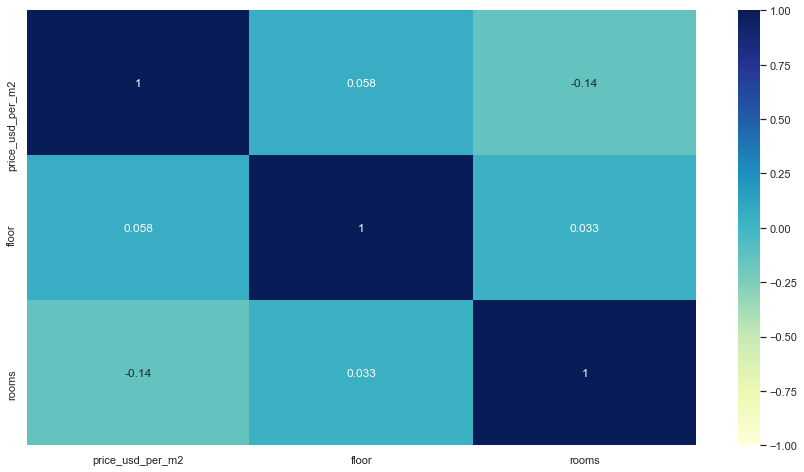

In [5]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_modelo.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu",annot=True);

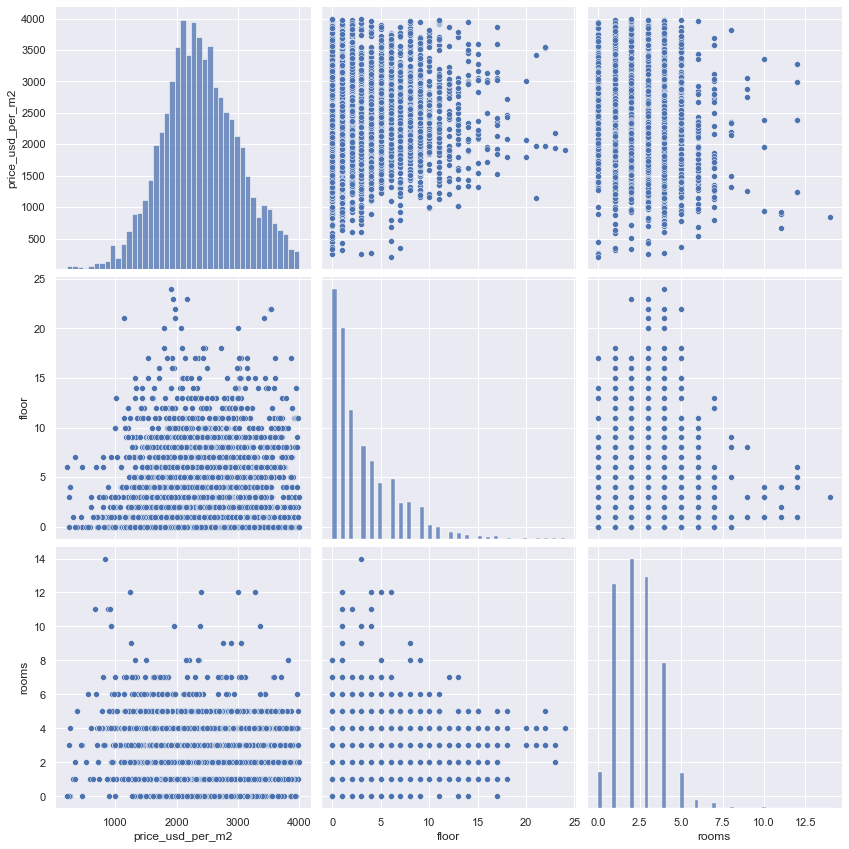

In [6]:
sns.pairplot(data=data_modelo, height=4)

In [7]:
name_model="Modelo 1" #Cambiar este nombre para cambiar los resultados de los estadísticos de cada algoritmo

## Pre-Training
### Manejo variables categóricas
Modificar las variables que deban ser dumificadas

In [8]:
#Creo dummies
#Convierto floor a object
data_modelo['floor'] = data_modelo['floor'].astype(np.object)
data_dummies=pd.get_dummies(data_modelo[['ptype','floor','place']], drop_first = True)
data_dummies

ptype_apartment  ptype_house  floor_1.0  floor_2.0  floor_3.0  \
0                   1            0          0          0          1   
1                   1            0          0          1          0   
2                   1            0          1          0          0   
3                   1            0          1          0          0   
4                   1            0          0          0          0   
...               ...          ...        ...        ...        ...   
6397                1            0          0          1          0   
6398                1            0          0          0          0   
6399                1            0          1          0          0   
6400                1            0          1          0          0   
6401                1            0          1          0          0   

      floor_4.0  floor_5.0  floor_6.0  floor_7.0  floor_8.0  ...  \
0             0          0          0          0          0  ...   
1             0          0          0          0          0  ...   
2             0          0          0          0          0  ...   
3             0          0          0          0          0  ...   
4             0          0          0          0          0  ...   
...         ...        ...        ...        ...        ...  ...   
6397          0          0          0          0          0  ...   
6398          1          0          0          0          0  ...   
6399          0          0          0          0          0  ...   
6400          0          0          0          0          0  ...   
6401          0          0          0          0          0  ...   

      place_Villa Lugano  place_Villa Luro  place_Villa Ortuzar  \
0                      0                 0                    0   
1                      0                 0                    0   
2                      0                 0                    0   
3                      0                 0                    0   
4                      0                 0                    0   
...                  ...               ...                  ...   
6397                   0                 0                    0   
6398                   0                 0                    0   
6399                   0                 0                    0   
6400                   0                 0                    0   
6401                   0                 0                    0   

      place_Villa Pueyrredón  place_Villa Real  place_Villa Riachuelo  \
0                          0                 0                      0   
1                          0                 0                      0   
2                          0                 0                      0   
3                          0                 0                      0   
4                          0                 0                      0   
...                      ...               ...                    ...   
6397                       0                 0                      0   
6398                       0                 0                      0   
6399                       0                 0                      0   
6400                       0                 0                      0   
6401                       0                 0                      0   

      place_Villa Santa Rita  place_Villa Soldati  place_Villa Urquiza  \
0                          0                    0                    0   
1                          0                    0                    0   
2                          0                    0                    0   
3                          0                    0                    0   
4                          0                    0                    0   
...                      ...                  ...                  ...   
6397                       0                    0                    0   
6398                       0                    0             

In [9]:
#Concateno las columnas que están por fuera del dummie
columnas=['price_usd_per_m2','rooms']
data_modelo = pd.concat([data[columnas],data_dummies], axis = 1)
data_modelo = data_modelo.reset_index(drop=True)
data_modelo.head(3)

price_usd_per_m2  rooms  ptype_apartment  ptype_house  floor_1.0  \
0       1309.090909    2.0                1            0          0   
1       1812.500000    4.0                1            0          0   
2       1702.127660    5.0                1            0          1   

   floor_2.0  floor_3.0  floor_4.0  floor_5.0  floor_6.0  ...  \
0          0          1          0          0          0  ...   
1          1          0          0          0          0  ...   
2          0          0          0          0          0  ...   

   place_Villa Lugano  place_Villa Luro  place_Villa Ortuzar  \
0                   0                 0                    0   
1                   0                 0                    0   
2                   0                 0                    0   

   place_Villa Pueyrredón  place_Villa Real  place_Villa Riachuelo  \
0                       0                 0                      0   
1                       0                 0                      0   
2                       0                 0                      0   

   place_Villa Santa Rita  place_Villa Soldati  place_Villa Urquiza  \
0                       0                    0                    0   
1                       0                    0                    0   
2                       0                    0                    0   

   place_Villa del Parque  
0                       0  
1                       0  
2                       0  

[3 rows x 74 columns]

## Algoritmos

In [10]:
#Genero mi variable X
X=data_modelo.drop(['price_usd_per_m2'],axis=1)

#Genero la variable y
y = data_modelo[y_columnas].squeeze()

#Creamos las muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100,shuffle=True)

### Linear Regression

In [11]:
#Entrenamos modelo LR
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
#Predecimos
lr_prediction = model_lr.predict(X_test)
lr_prediction_train = model_lr.predict(X_train)

intercept_lr = model_lr.intercept_
coeff_lr = model_lr.coef_
r2_test_lr = model_lr.score(X_test, y_test)
r2_train_lr = model_lr.score(X_train, y_train)
n = len(y_test)
p = np.count_nonzero(coeff_lr)
r2_adj_test_lr = 1-((1-r2_test_lr)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_lr = 1-((1-r2_train_lr)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_lr = mean_squared_error(y_test, lr_prediction)
mse_train_lr = mean_squared_error(y_train, lr_prediction_train)
mae_test_lr = mean_absolute_error(y_test, lr_prediction)
mae_train_lr = mean_absolute_error(y_train, lr_prediction_train)
rmse_test_lr = np.sqrt(mse_test_lr)
rmse_train_lr = np.sqrt(mse_train_lr)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_lr=[mse_test_lr, mse_train_lr,
            mae_test_lr, mae_train_lr, 
            rmse_test_lr,rmse_train_lr,
            r2_test_lr,r2_train_lr,
            r2_adj_test_lr,r2_adj_train_lr
         ]

stats_dataframe_lr=pd.DataFrame({name_model+' LR':stats_lr},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_lr

Modelo 1 LR
MSE Test      6.465517e+28
MSE Train     2.400366e+05
MAE Test      5.865635e+12
MAE Train     3.784041e+02
RMSE Test     2.542738e+14
RMSE Train    4.899353e+02
R2 Test      -1.690366e+23
R2 Train      3.818688e-01
R2 Adj Test  -1.757175e+23
R2 Adj Train  3.716297e-01

In [12]:
print("Intercept:", intercept_lr)
print("Coeficientes:")
print(print(pd.Series(coeff_lr, index=X.columns)))

Intercept: 2219.622661803516
Coeficientes:
rooms                      -65.103776
ptype_apartment            154.305392
ptype_house                133.368189
floor_1.0                  -43.732114
floor_2.0                   18.301481
                             ...     
place_Villa Riachuelo     -482.389814
place_Villa Santa Rita    -221.060848
place_Villa Soldati      -1176.215416
place_Villa Urquiza        281.885783
place_Villa del Parque    -151.642746
Length: 73, dtype: float64
None


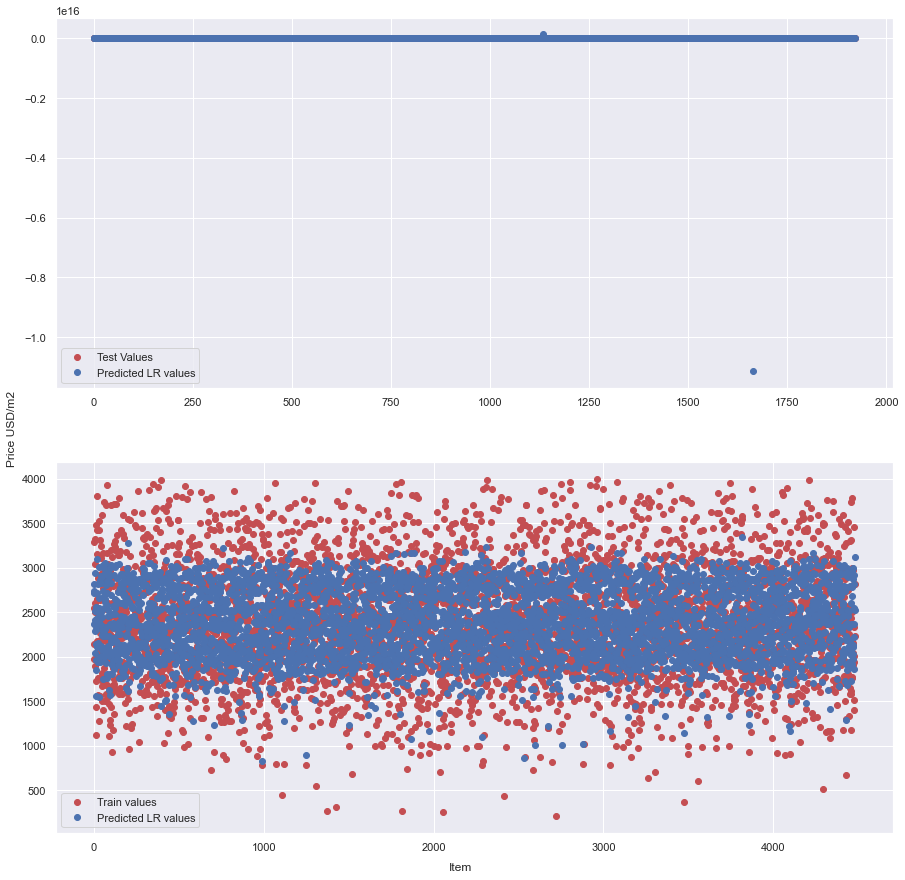

In [13]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],lr_prediction, 'bo', label="Predicted LR values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],lr_prediction_train, 'bo', label="Predicted LR values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

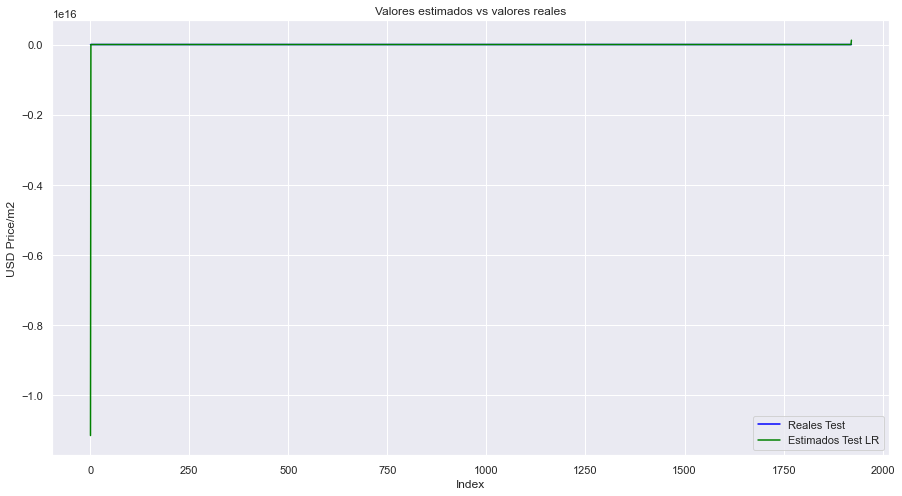

In [14]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(lr_prediction), color='green', label='Estimados Test LR')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

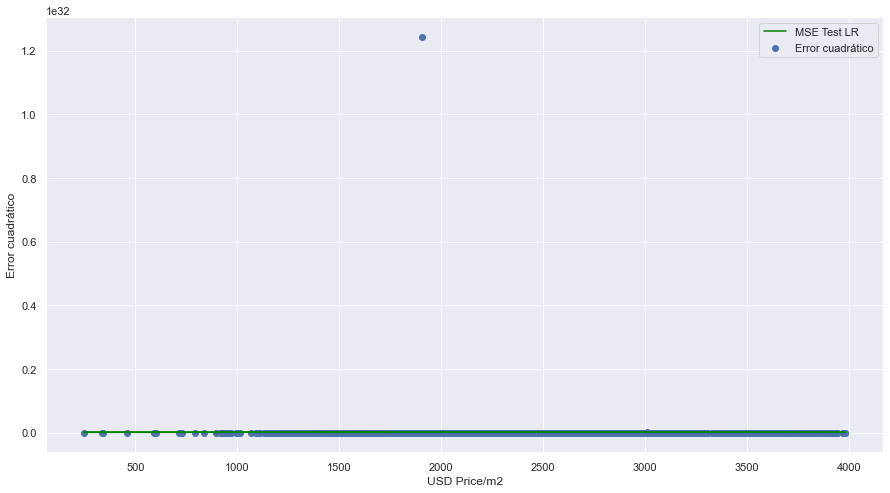

In [15]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_lr=pow(y_test - lr_prediction,2)
plt.scatter(y_test,err_cuad_test_lr, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_lr,len(err_cuad_test_lr)), label='MSE Test LR', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

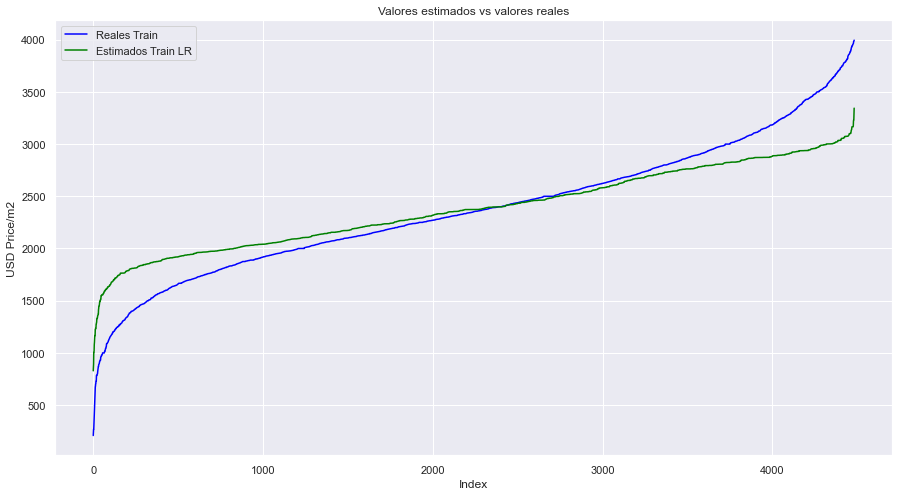

In [16]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(lr_prediction_train), color='green', label='Estimados Train LR')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

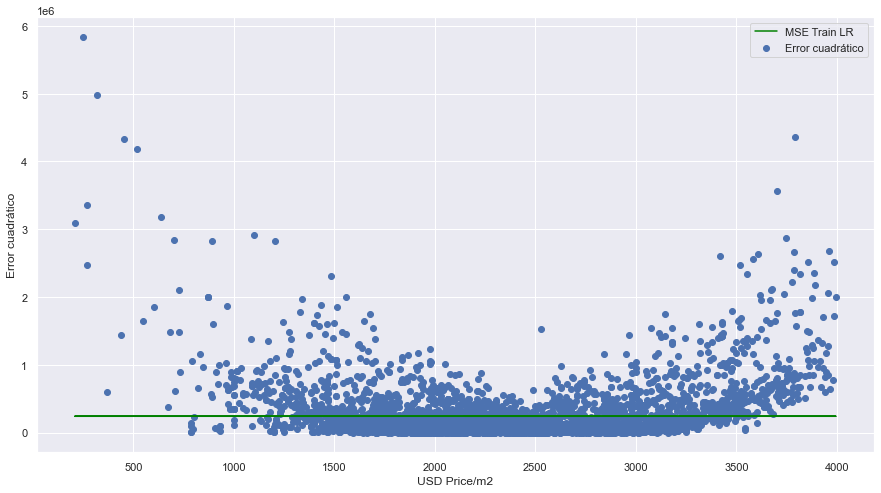

In [17]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_lr=pow(y_train - lr_prediction_train,2)
plt.scatter(y_train,err_cuad_train_lr, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_lr,len(err_cuad_train_lr)), label='MSE Train LR', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

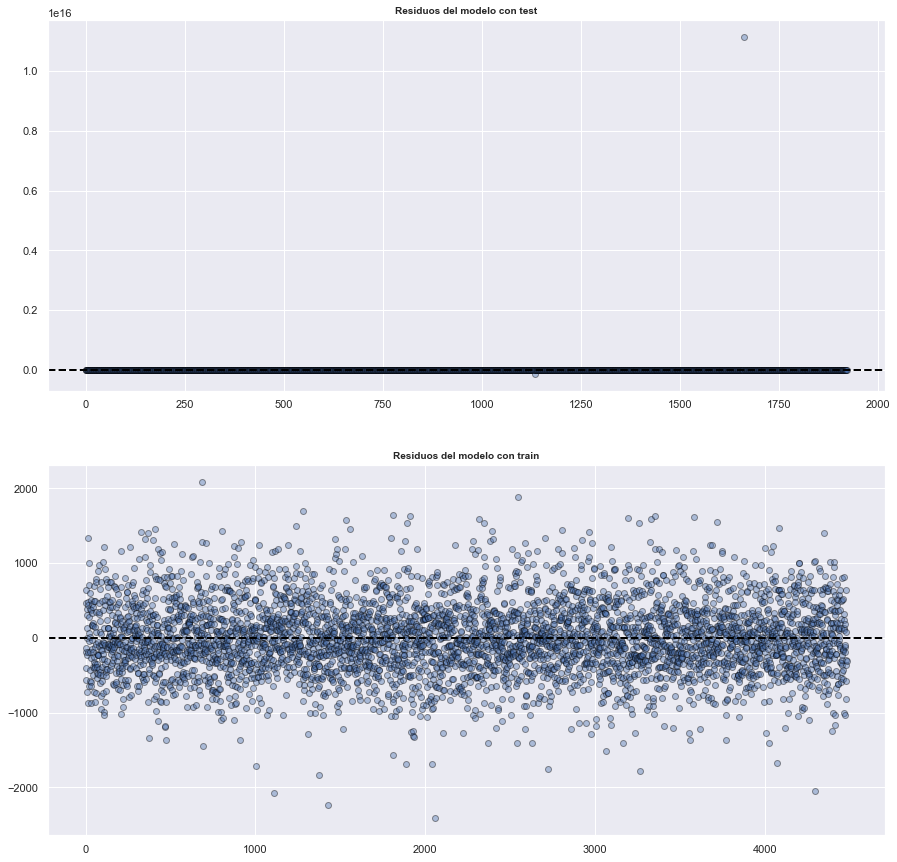

In [18]:
#Gráfico de los residuos/errores
model_residuals_test_lr = y_test - lr_prediction
model_residuals_train_lr = y_train-lr_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_lr,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_lr,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

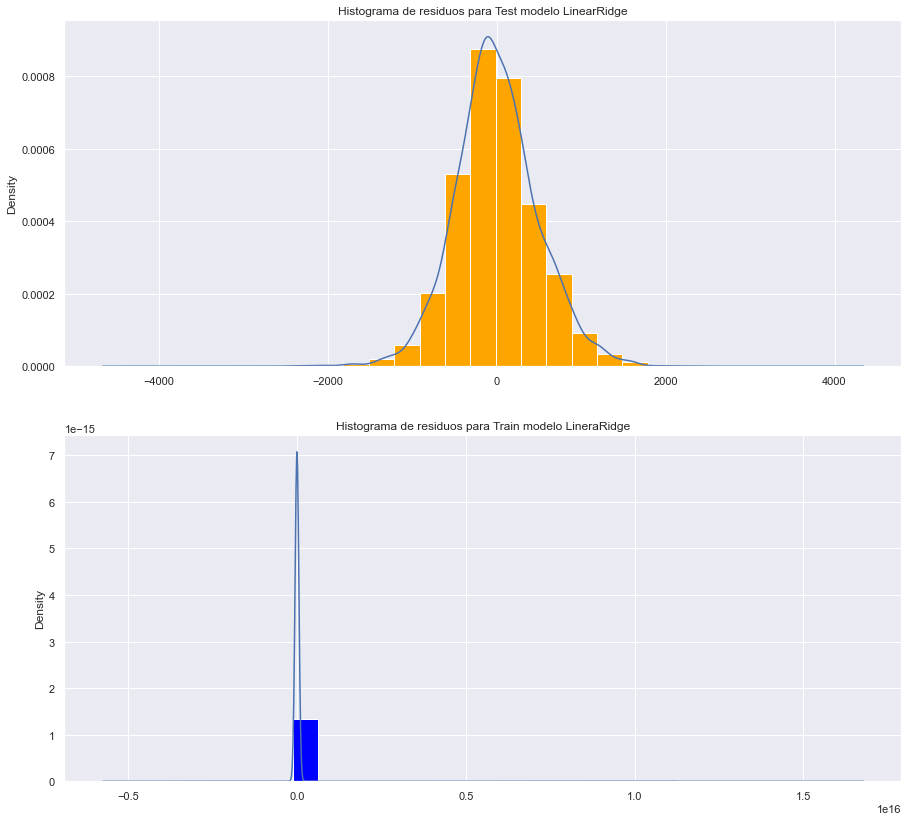

In [19]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_lr.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_lr.plot(kind = "kde",ax=ax2);
model_residuals_train_lr.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_lr.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo LinearRidge");
ax2.set_title("Histograma de residuos para Train modelo LineraRidge");

### OLS

In [20]:
#Entrenamos modelo OLS
X_train_sm = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_sm).fit()
#Predecimos
X_test_sm = sm.add_constant(X_test)
sm_prediction = model_ols.predict(X_test_sm)
X_train_sm = sm.add_constant(X_train)
sm_prediction_train = model_ols.predict(X_train_sm)

r2_test_ols = r2_score(y_test,sm_prediction)
r2_train_ols = r2_score(y_train,sm_prediction_train)
r2_adj_test_ols = sm.OLS(y_test, X_test_sm).fit().rsquared_adj
r2_adj_train_ols = model_ols.rsquared_adj
mse_test_ols = mean_squared_error(y_test, sm_prediction)
mse_train_ols = mean_squared_error(y_train, sm_prediction_train)
mae_test_ols = mean_absolute_error(y_test, sm_prediction)
mae_train_ols = mean_absolute_error(y_train, sm_prediction_train)
rmse_test_ols = np.sqrt(mse_test_ols)
rmse_train_ols = np.sqrt(mse_train_ols)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_ols=[mse_test_ols, mse_train_ols,
            mae_test_ols, mae_train_ols, 
            rmse_test_ols,rmse_train_ols,
            r2_test_ols,r2_train_ols,
            r2_adj_test_ols,r2_adj_train_ols
         ]

stats_dataframe_ols=pd.DataFrame({name_model+' OLS':stats_ols},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])

#Summary
print(model_ols.summary())
print("")
print(stats_dataframe_ols)

                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     38.36
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:02:17   Log-Likelihood:                -34115.
No. Observations:                4481   AIC:                         6.837e+04
Df Residuals:                    4409   BIC:                         6.883e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

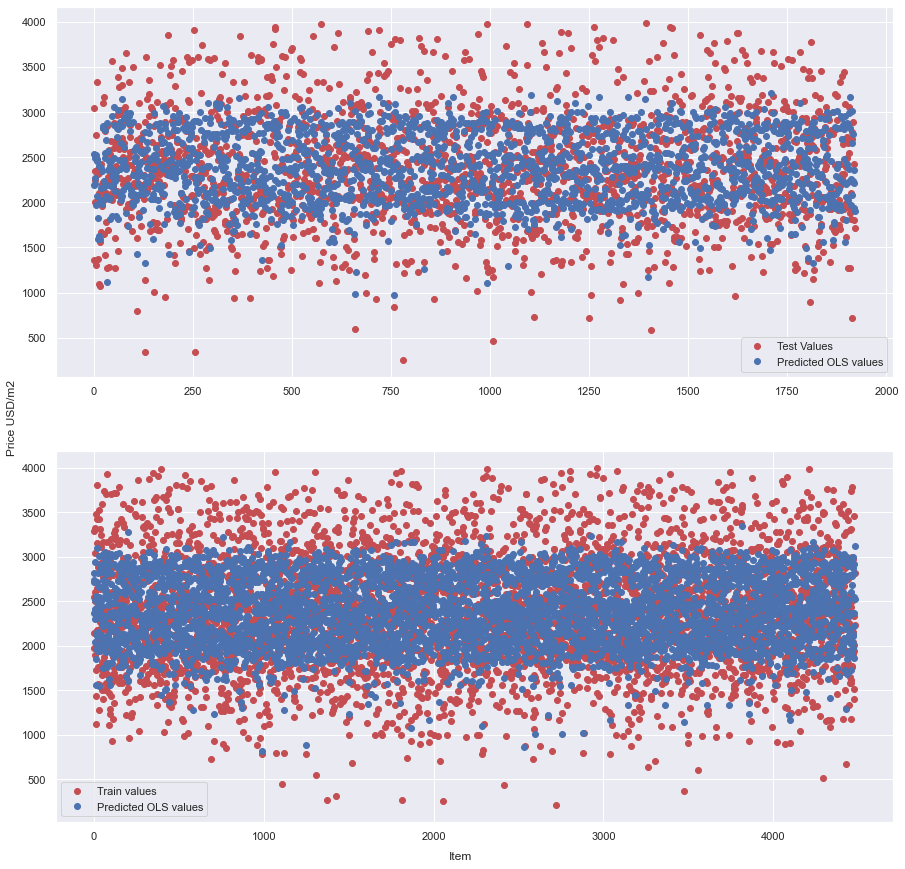

In [21]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],sm_prediction, 'bo', label="Predicted OLS values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],sm_prediction_train, 'bo', label="Predicted OLS values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

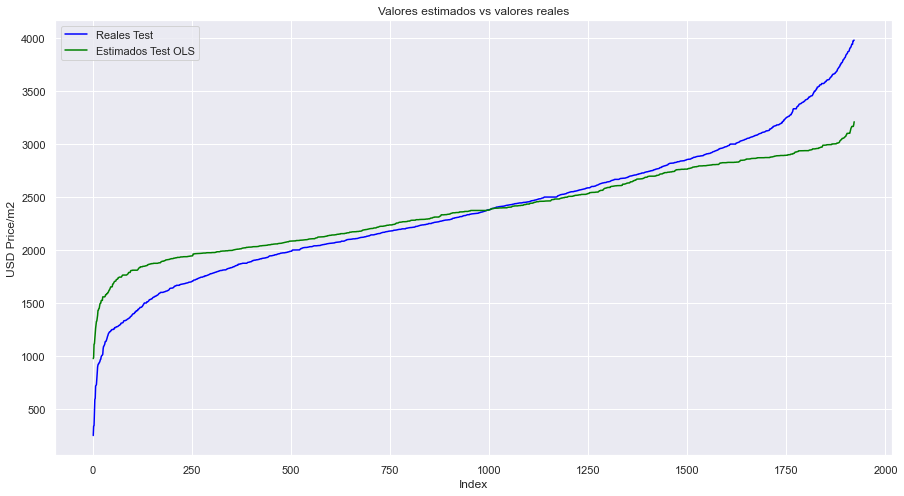

In [22]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(sm_prediction), color='green', label='Estimados Test OLS')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

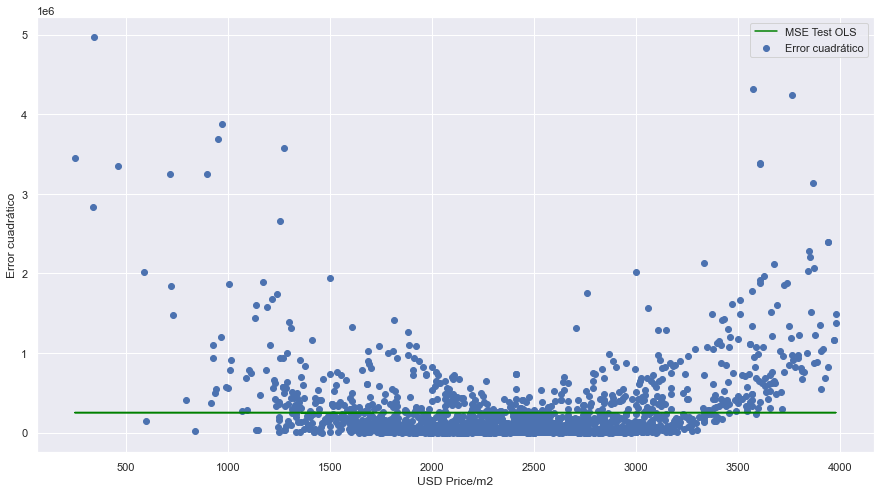

In [23]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_ols=pow(y_test - sm_prediction,2)
plt.scatter(y_test,err_cuad_test_ols, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_ols,len(err_cuad_test_ols)), label='MSE Test OLS', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

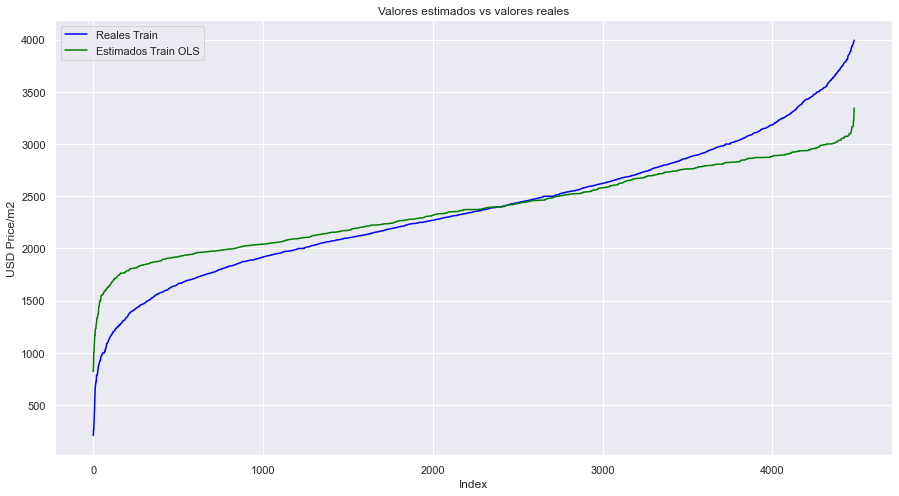

In [24]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(sm_prediction_train), color='green', label='Estimados Train OLS')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

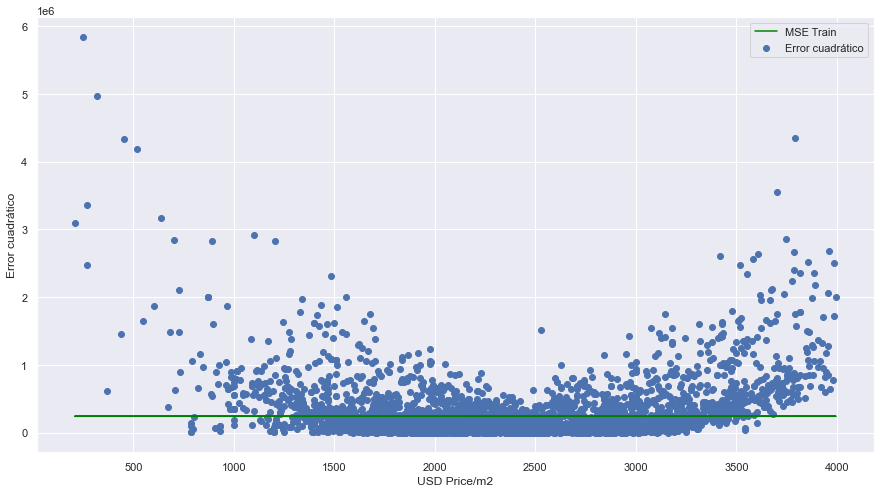

In [25]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_ols=pow(y_train - sm_prediction_train,2)
plt.scatter(y_train,err_cuad_train_ols, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_ols,len(err_cuad_train_ols)), label='MSE Train', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

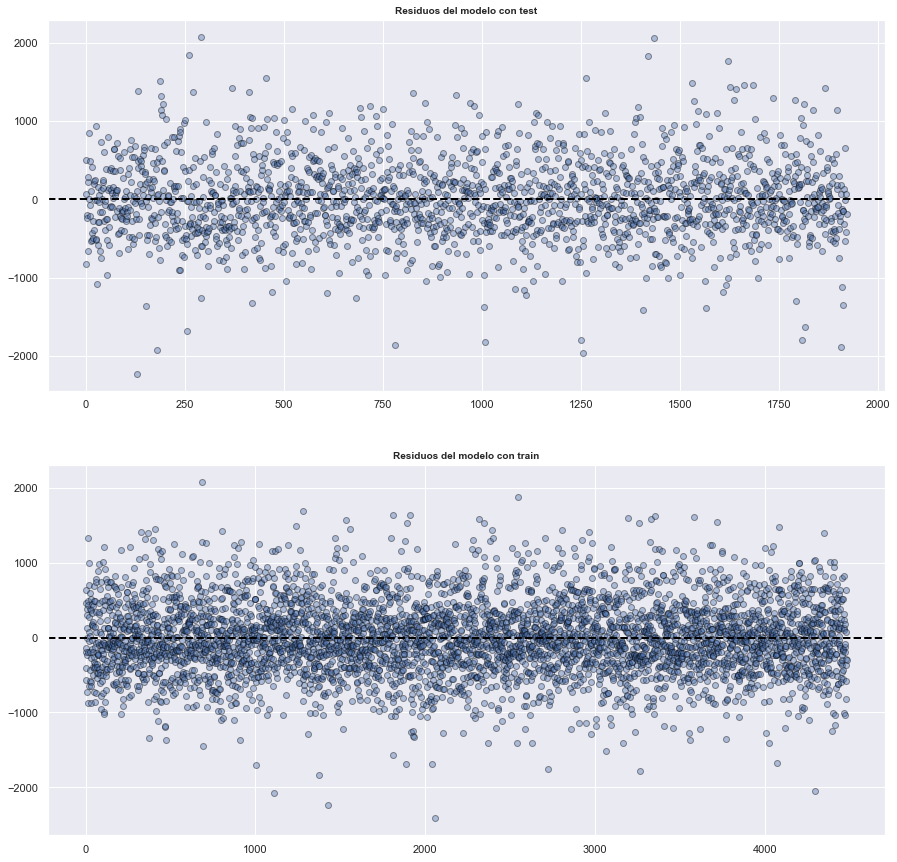

In [26]:
#Gráfico de los residuos/errores
model_residuals_test_ols = y_test - sm_prediction
model_residuals_train_ols = y_train - sm_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_ols,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_ols,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

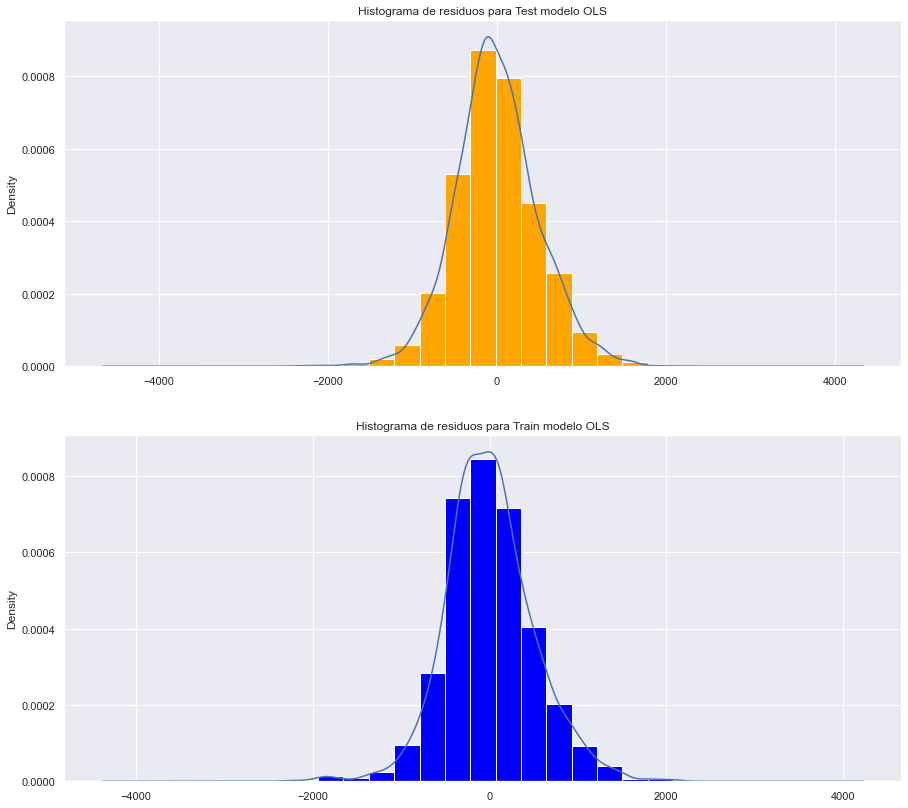

In [27]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_ols.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_ols.plot(kind = "kde",ax=ax2);
model_residuals_train_ols.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_ols.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo OLS");
ax2.set_title("Histograma de residuos para Train modelo OLS");

### LASSO

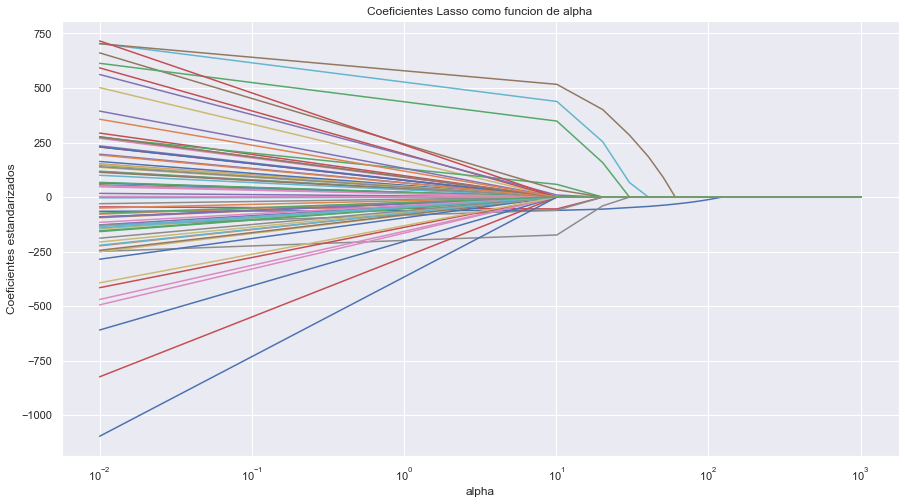

In [28]:
#Análisis previo de los alpha
alphas_lasso = np.linspace(0.01,1000,100)
lasso = linear_model.Lasso(max_iter = 10000, normalize = False)
coefs = []

for a in alphas_lasso:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas_lasso, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Lasso como funcion de alpha');

In [29]:
#Creamos el modelo
lassocv = linear_model.LassoCV(alphas=None,normalize=False,cv=10,random_state=10, max_iter=10000)
#Lo entrenamos
model_lasso = lassocv.fit(X_train, y_train)
#Lo probamos
lasso_prediction = model_lasso.predict(X_test)
lasso_prediction_train = model_lasso.predict(X_train)

alpha_lasso = model_lasso.alpha_
coeff_lasso = model_lasso.coef_
intercept_lasso = model_lasso.intercept_
r2_test_lasso = model_lasso.score(X_test, y_test)
r2_train_lasso = model_lasso.score(X_train, y_train)
p = np.count_nonzero(coeff_lasso)
r2_adj_test_lasso = 1-((1-r2_test_lasso)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_lasso = 1-((1-r2_train_lasso)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_lasso = mean_squared_error(y_test, lasso_prediction)
mse_train_lasso = mean_squared_error(y_train, lasso_prediction_train)
mae_test_lasso = mean_absolute_error(y_test, lasso_prediction)
mae_train_lasso = mean_absolute_error(y_train, lasso_prediction_train)
rmse_test_lasso = np.sqrt(mse_test_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_lasso = [mse_test_lasso, mse_train_lasso,
                mae_test_lasso, mae_train_lasso, 
                rmse_test_lasso,rmse_train_lasso,
                r2_test_lasso,r2_train_lasso,
                r2_adj_test_lasso,r2_adj_train_lasso
                ]

stats_dataframe_lasso =pd.DataFrame({name_model+' Lasso':stats_lasso},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_lasso

Modelo 1 Lasso
MSE Test       250471.291511
MSE Train      240294.939093
MAE Test          380.909178
MAE Train         378.908956
RMSE Test         500.471070
RMSE Train        490.198877
R2 Test             0.345160
R2 Train            0.381204
R2 Adj Test         0.322944
R2 Adj Train        0.372378

In [30]:
print("Alpha Lasso:",alpha_lasso)
print("Intercept Lasso:",intercept_lasso)
print("Coeficientes Ridge:")
print(pd.Series(coeff_lasso, index=X.columns))

Alpha Lasso: 0.1224813581414503
Intercept Lasso: 2078.109505387884
Coeficientes Ridge:
rooms                     -64.867727
ptype_apartment           143.068712
ptype_house                 0.000000
floor_1.0                 -52.408829
floor_2.0                   7.648599
                             ...    
place_Villa Riachuelo    -141.768544
place_Villa Santa Rita    -39.662156
place_Villa Soldati      -887.055883
place_Villa Urquiza       436.853178
place_Villa del Parque      0.000000
Length: 73, dtype: float64


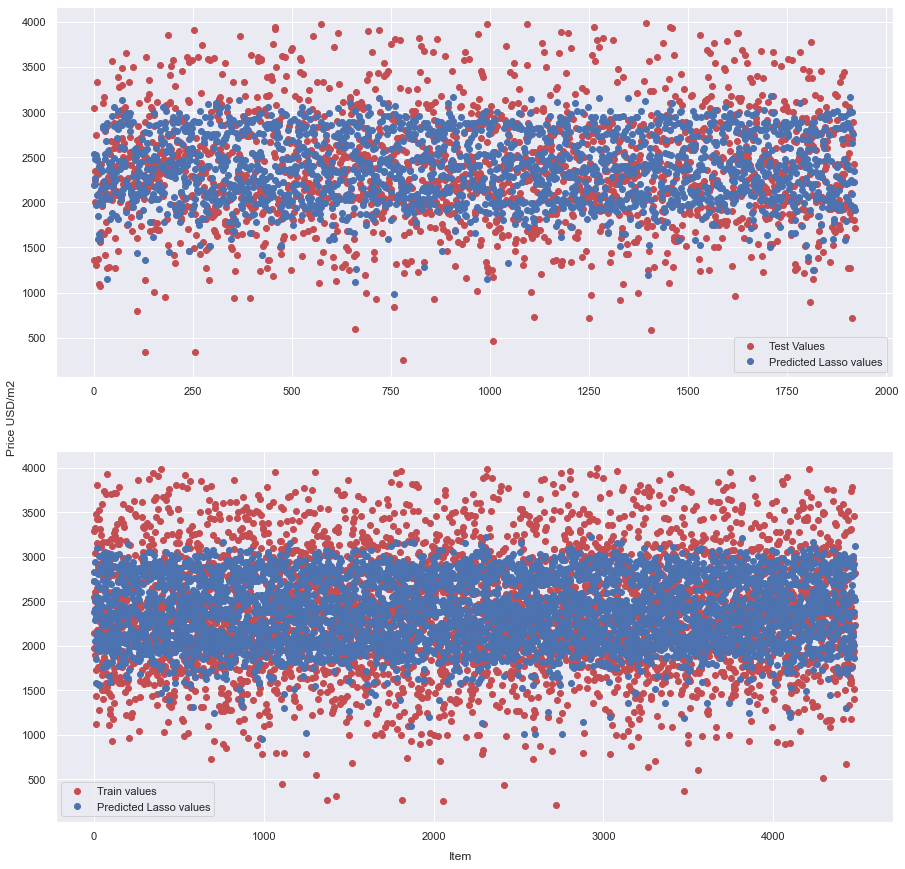

In [31]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],lasso_prediction, 'bo', label="Predicted Lasso values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],lasso_prediction_train, 'bo', label="Predicted Lasso values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

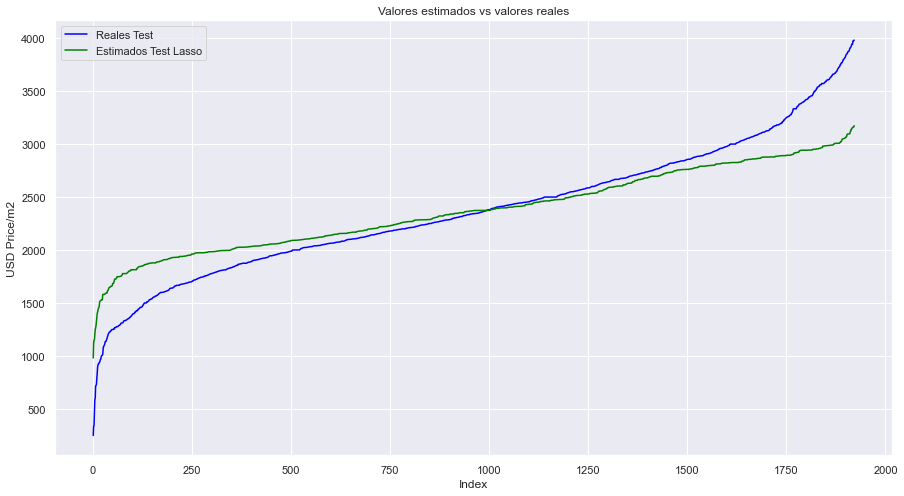

In [32]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(lasso_prediction), color='green', label='Estimados Test Lasso')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

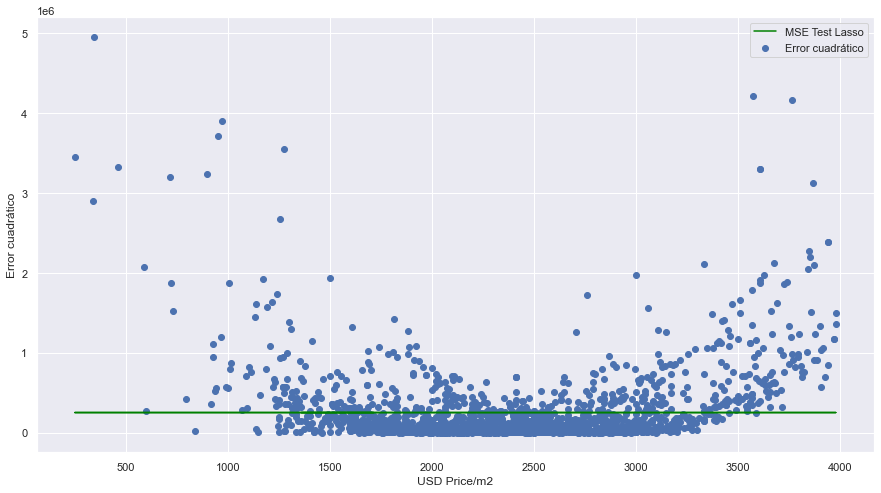

In [33]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_lasso=pow(y_test - lasso_prediction,2)
plt.scatter(y_test,err_cuad_test_lasso, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_lasso,len(err_cuad_test_lasso)), label='MSE Test Lasso', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

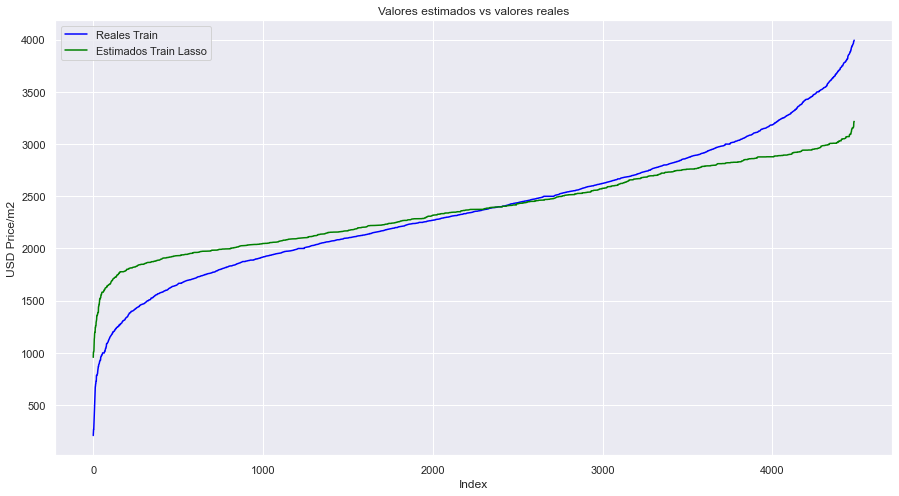

In [34]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(lasso_prediction_train), color='green', label='Estimados Train Lasso')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

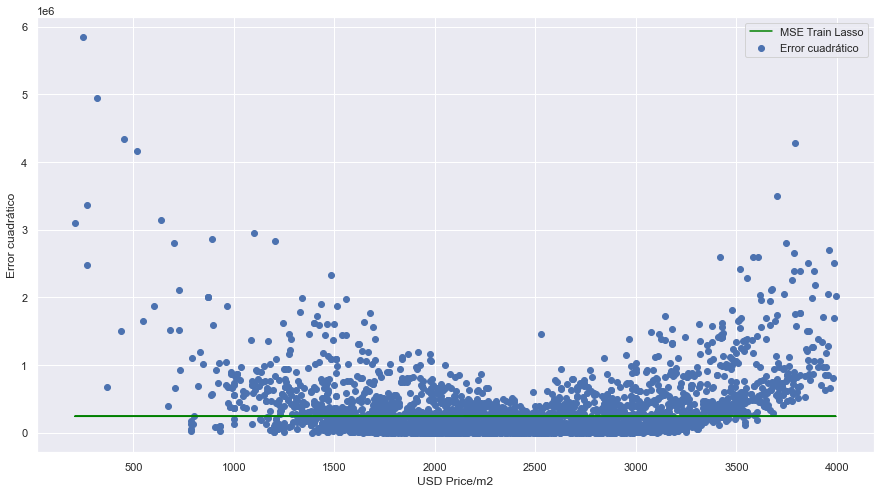

In [35]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_lasso=pow(y_train - lasso_prediction_train,2)
plt.scatter(y_train,err_cuad_train_lasso, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_lasso,len(err_cuad_train_lasso)), label='MSE Train Lasso', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

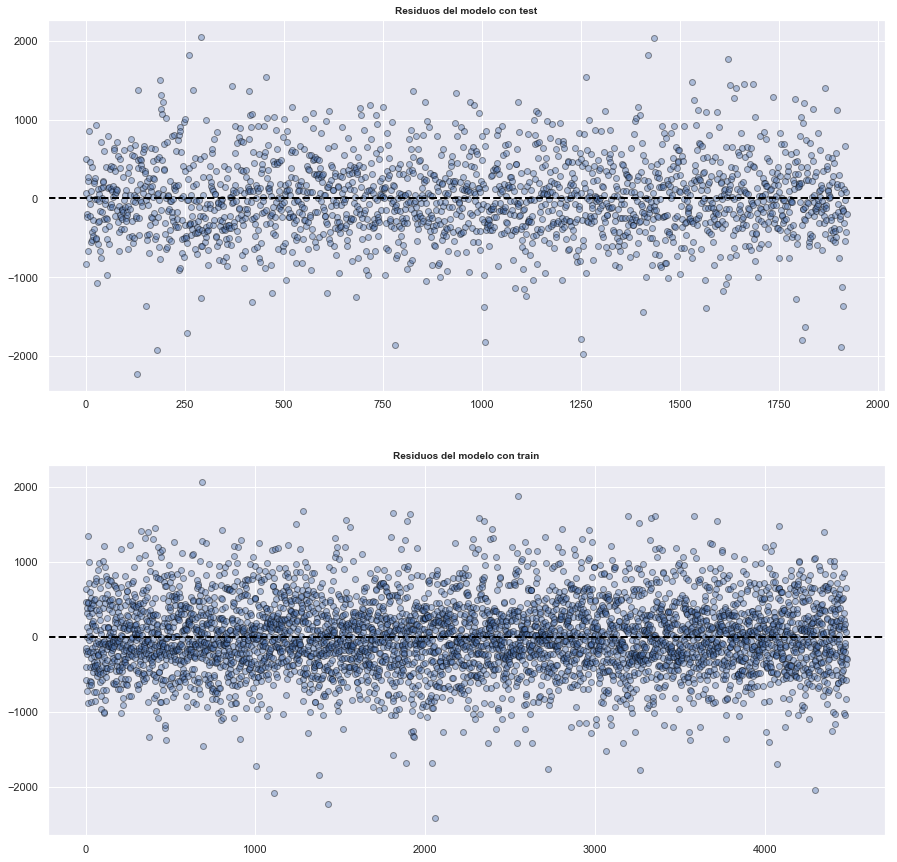

In [36]:
#Gráfico de los residuos/errores
model_residuals_test_lasso = y_test - lasso_prediction
model_residuals_train_lasso = y_train-lasso_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_lasso,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_lasso,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

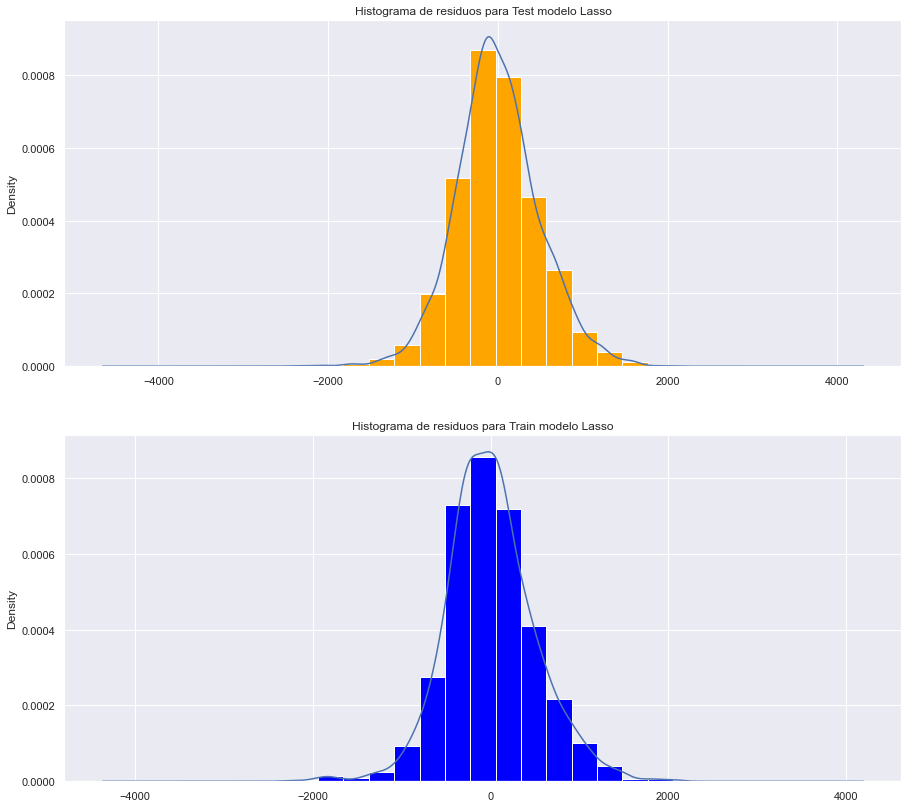

In [37]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_lasso.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_lasso.plot(kind = "kde",ax=ax2);
model_residuals_train_lasso.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_lasso.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo Lasso");
ax2.set_title("Histograma de residuos para Train modelo Lasso");

## Ridge

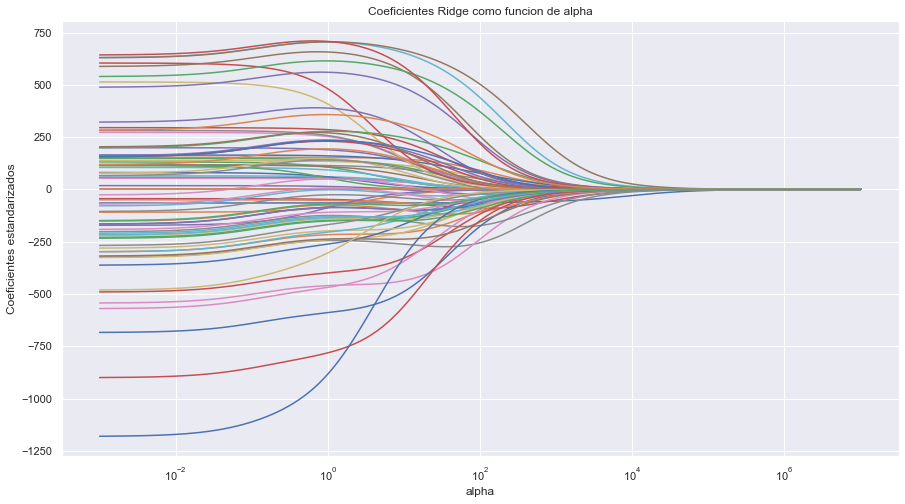

In [38]:
#Análisis previo de los alpha
#alphas_ridge = np.logspace(-10, 10, 400)
alphas_ridge = np.logspace(-3, 7,400)
ridge = linear_model.Ridge(max_iter=10000)
coefs = []

for a in alphas_ridge:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas_ridge, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Ridge como funcion de alpha');

In [39]:
#Creamos el modelo
ridgecv = linear_model.RidgeCV(alphas=alphas_ridge,normalize=False,cv=10)
#Lo entrenamos
model_ridge = ridgecv.fit(X_train, y_train)
#Lo probamos
ridge_prediction = model_ridge.predict(X_test)
ridge_prediction_train = model_ridge.predict(X_train)

alpha_ridge = model_ridge.alpha_
coeff_ridge = model_ridge.coef_
intercept_ridge = model_ridge.intercept_
r2_test_ridge = model_ridge.score(X_test, y_test)
r2_train_ridge = model_ridge.score(X_train, y_train)
p = np.count_nonzero(coeff_ridge)
r2_adj_test_ridge = 1-((1-r2_test_ridge)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_ridge = 1-((1-r2_train_ridge)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_ridge = mean_squared_error(y_test, ridge_prediction)
mse_train_ridge = mean_squared_error(y_train, ridge_prediction_train)
mae_test_ridge = mean_absolute_error(y_test, ridge_prediction)
mae_train_ridge = mean_absolute_error(y_train, ridge_prediction_train)
rmse_test_ridge = np.sqrt(mse_test_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_ridge = [mse_test_ridge, mse_train_ridge,
                mae_test_ridge, mae_train_ridge, 
                rmse_test_ridge,rmse_train_ridge,
                r2_test_ridge,r2_train_ridge,
                r2_adj_test_ridge,r2_adj_train_ridge
                ]

stats_dataframe_ridge =pd.DataFrame({name_model+' Ridge':stats_ridge},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_ridge

Modelo 1 Ridge
MSE Test       250325.311693
MSE Train      240191.402088
MAE Test          380.886690
MAE Train         378.816159
RMSE Test         500.325206
RMSE Train        490.093259
R2 Test             0.345541
R2 Train            0.381470
R2 Adj Test         0.320411
R2 Adj Train        0.371510

In [40]:
print("Alpha Ridge:",alpha_ridge)
print("Intercept Ridge:",intercept_ridge)
print("Coeficientes Ridge:")
print(pd.Series(coeff_ridge, index=X.columns))

Alpha Ridge: 1.2097810206889013
Intercept Ridge: 2146.012329184436
Coeficientes Ridge:
rooms                     -65.082453
ptype_apartment           152.487639
ptype_house               102.413169
floor_1.0                 -48.457591
floor_2.0                  13.476897
                             ...    
place_Villa Riachuelo    -288.518034
place_Villa Santa Rita   -134.264447
place_Villa Soldati      -847.111447
place_Villa Urquiza       357.209723
place_Villa del Parque    -69.031466
Length: 73, dtype: float64


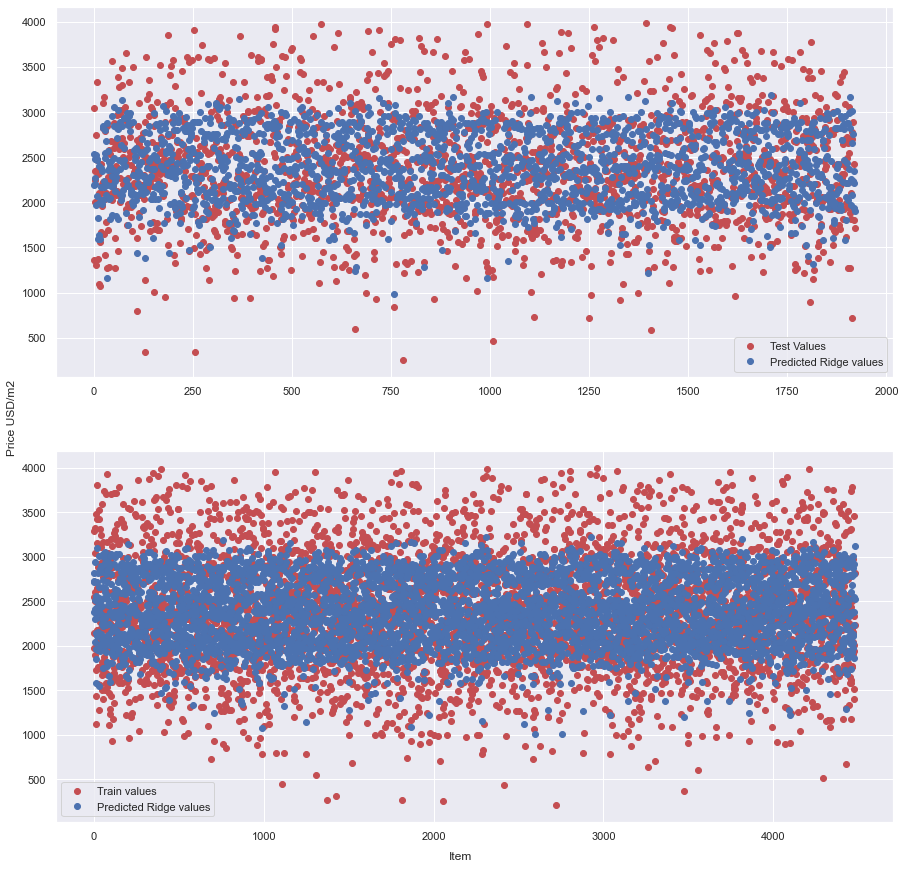

In [41]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],ridge_prediction, 'bo', label="Predicted Ridge values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],ridge_prediction_train, 'bo', label="Predicted Ridge values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

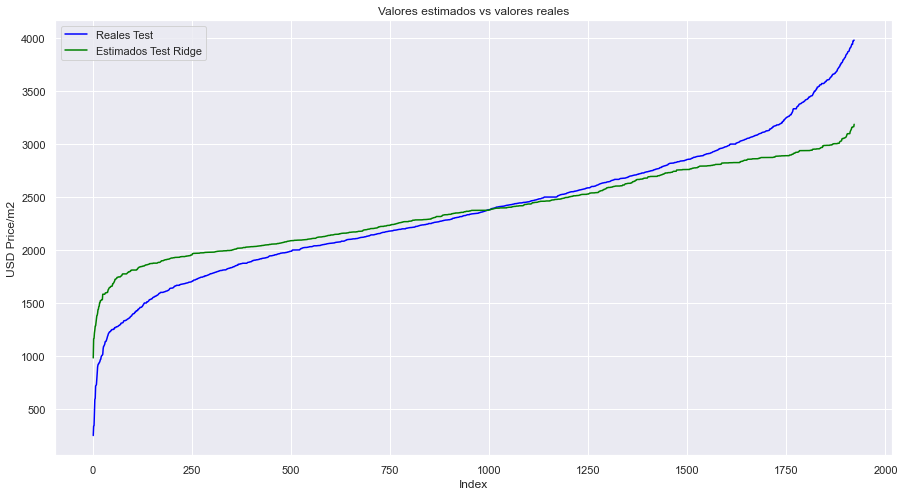

In [42]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(ridge_prediction), color='green', label='Estimados Test Ridge')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

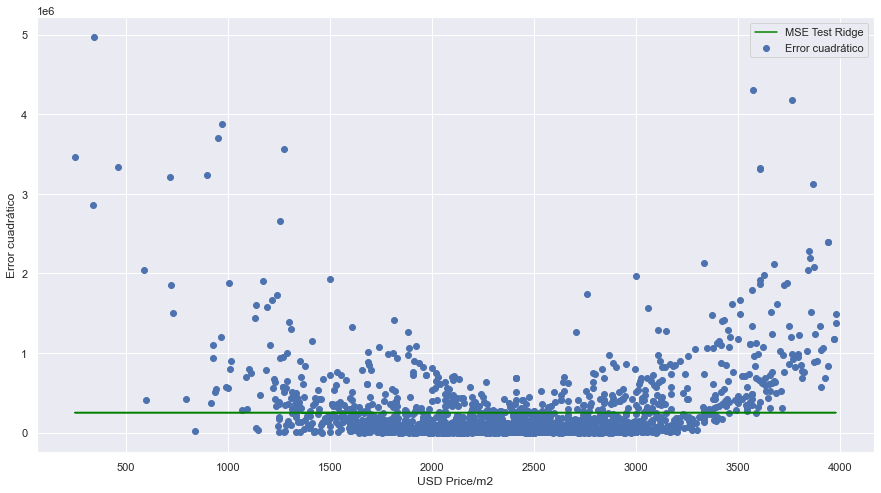

In [43]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_ridge=pow(y_test - ridge_prediction,2)
plt.scatter(y_test,err_cuad_test_ridge, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_ridge,len(err_cuad_test_ridge)), label='MSE Test Ridge', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

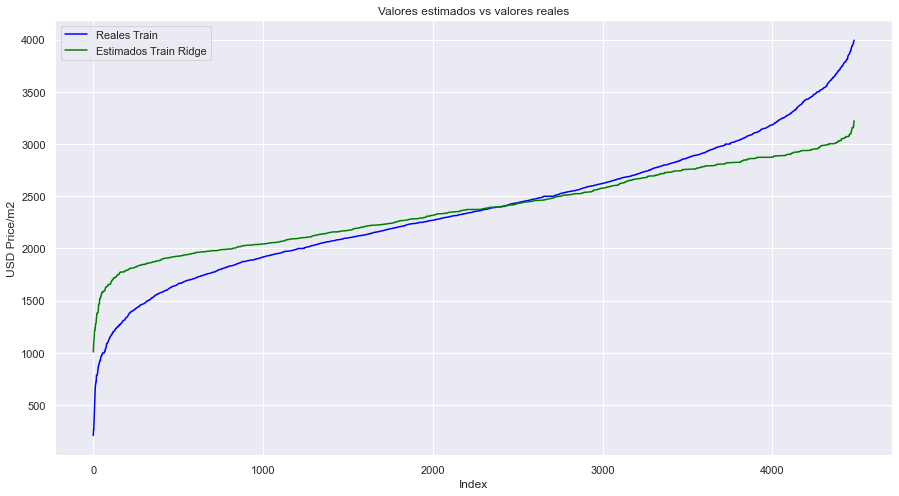

In [44]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(ridge_prediction_train), color='green', label='Estimados Train Ridge')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

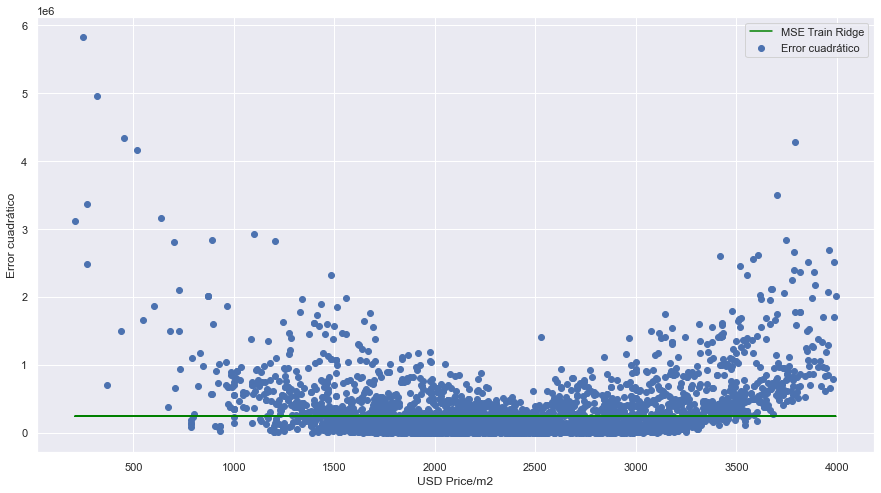

In [45]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_ridge=pow(y_train - ridge_prediction_train,2)
plt.scatter(y_train,err_cuad_train_ridge, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_ridge,len(err_cuad_train_ridge)), label='MSE Train Ridge', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

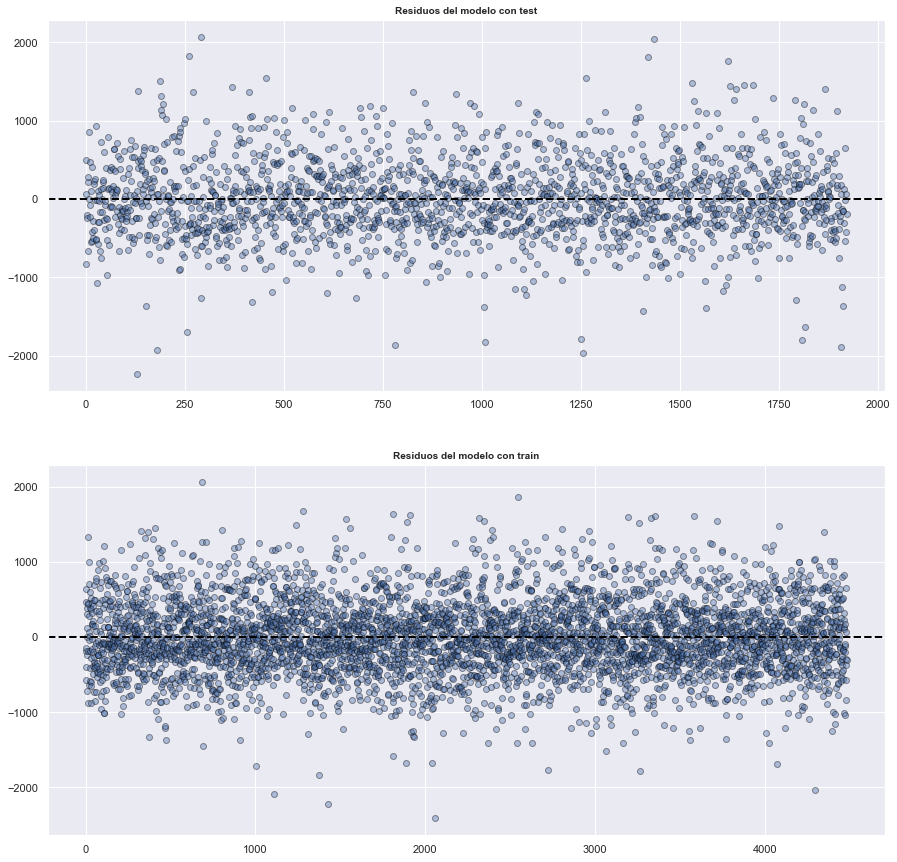

In [46]:
#Gráfico de los residuos/errores
model_residuals_test_ridge = y_test - ridge_prediction
model_residuals_train_ridge = y_train-ridge_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_ridge,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_ridge,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

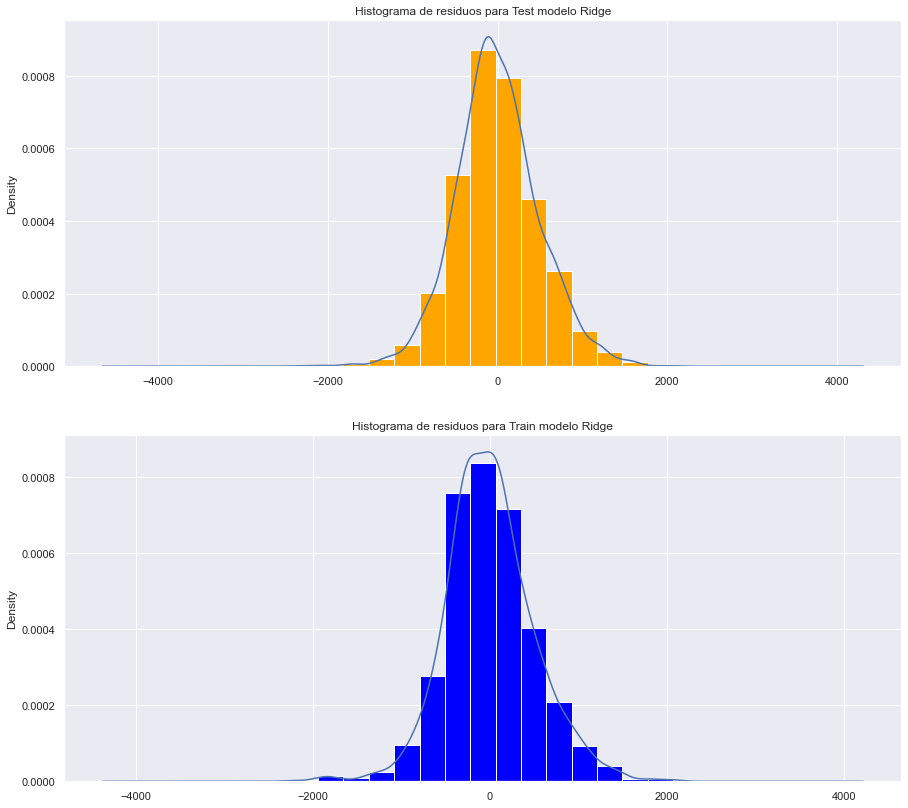

In [47]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_ridge.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_ridge.plot(kind = "kde",ax=ax2);
model_residuals_train_ridge.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_ridge.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo Ridge");
ax2.set_title("Histograma de residuos para Train modelo Ridge");

----
## Modelos comparados entre sí

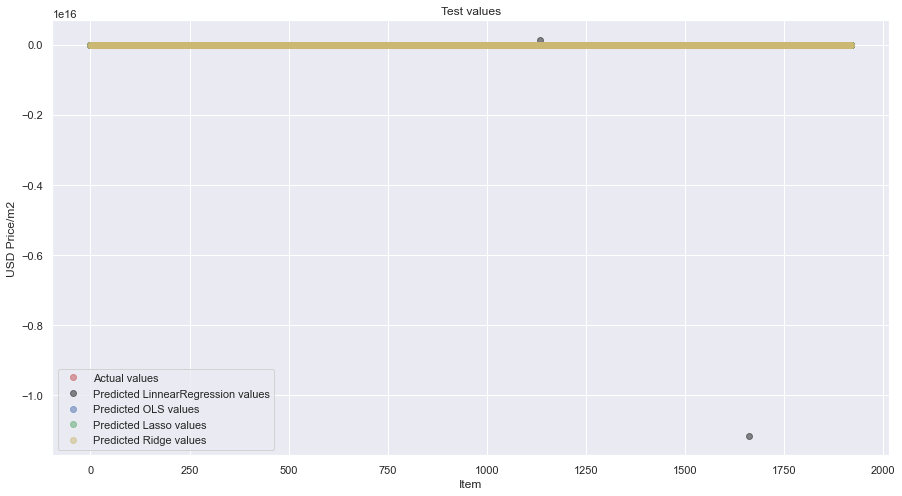

In [48]:
plt.figure(figsize=(15, 8))

plt.plot([i for i in range(len(y_test))],y_test, 'ro',label="Actual values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],lr_prediction, 'ko',label="Predicted LinnearRegression values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],sm_prediction, 'bo', label="Predicted OLS values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],lasso_prediction, 'go', label="Predicted Lasso values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],ridge_prediction, 'yo', label="Predicted Ridge values",alpha=0.5)

plt.legend()
plt.ylabel('USD Price/m2')
plt.xlabel('Item')
plt.title("Test values")
plt.show()

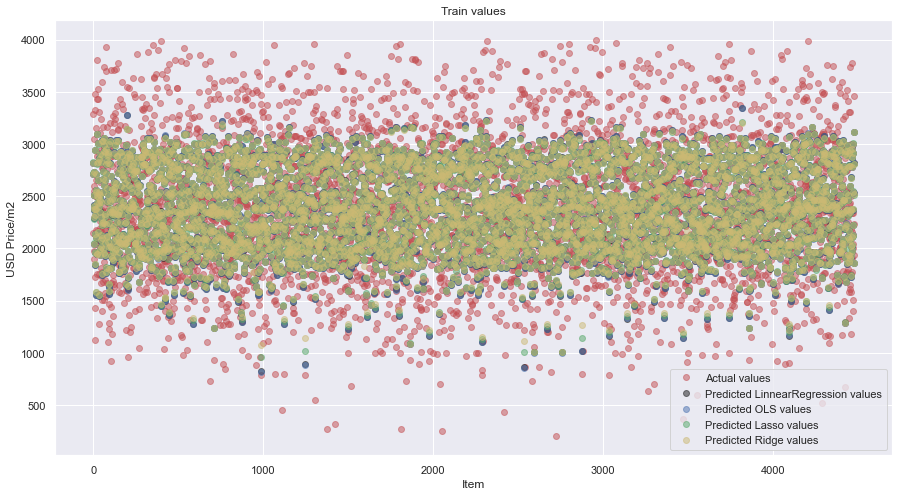

In [49]:
plt.figure(figsize=(15, 8))

plt.plot([i for i in range(len(y_train))],y_train, 'ro',label="Actual values",alpha=0.5)
plt.plot([i for i in range(len(y_train))],lr_prediction_train, 'ko',label="Predicted LinnearRegression values",alpha=0.5)
plt.plot([i for i in range(len(y_train))],sm_prediction_train, 'bo', label="Predicted OLS values",alpha=0.5)
plt.plot([i for i in range(len(y_train))],lasso_prediction_train, 'go', label="Predicted Lasso values",alpha=0.5)
plt.plot([i for i in range(len(y_train))],ridge_prediction_train, 'yo', label="Predicted Ridge values",alpha=0.5)

plt.legend()
plt.ylabel('USD Price/m2')
plt.xlabel('Item')
plt.title("Train values")
plt.show()

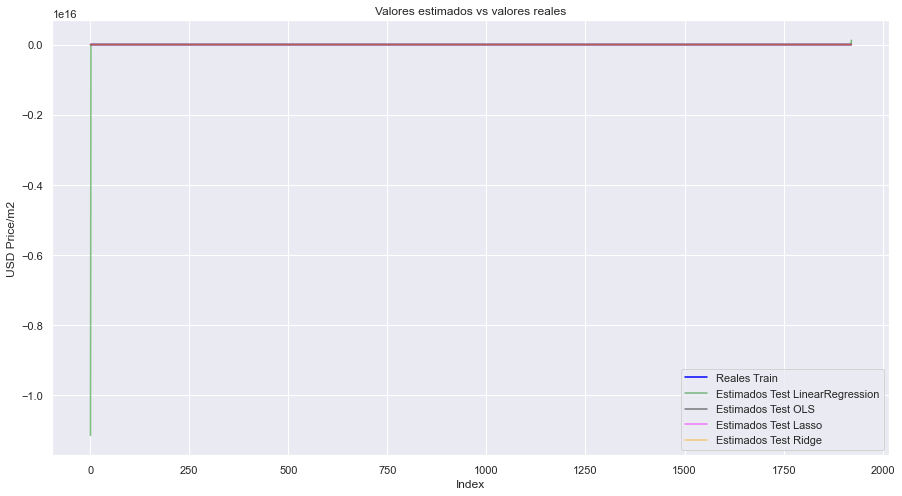

In [50]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(lr_prediction), color='green', label='Estimados Test LinearRegression', alpha=0.5)
plt.plot(eje_X, sorted(sm_prediction), color='black', label='Estimados Test OLS', alpha=0.5)
plt.plot(eje_X, sorted(lasso_prediction), color='magenta', label='Estimados Test Lasso', alpha=0.5)
plt.plot(eje_X, sorted(ridge_prediction), color='orange', label='Estimados Test Ridge', alpha=0.5)
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

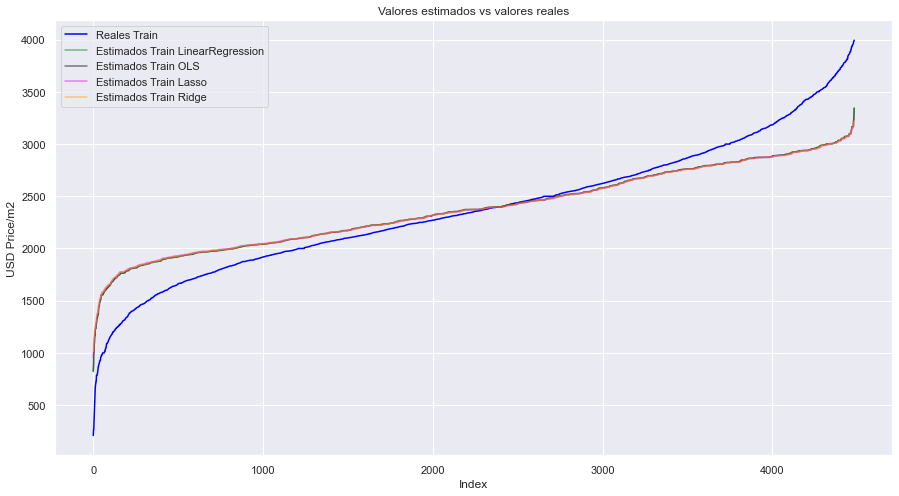

In [51]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(lr_prediction_train), color='green', label='Estimados Train LinearRegression', alpha=0.5)
plt.plot(eje_X, sorted(sm_prediction_train), color='black', label='Estimados Train OLS', alpha=0.5)
plt.plot(eje_X, sorted(lasso_prediction_train), color='magenta', label='Estimados Train Lasso', alpha=0.5)
plt.plot(eje_X, sorted(ridge_prediction_train), color='orange', label='Estimados Train Ridge', alpha=0.5)
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [52]:
# Valores estadísticos
pd.concat([stats_dataframe_lr,stats_dataframe_ols,stats_dataframe_lasso,stats_dataframe_ridge],axis=1)

Modelo 1 LR   Modelo 1 OLS  Modelo 1 Lasso  Modelo 1 Ridge
MSE Test      6.465517e+28  250547.143518   250471.291511   250325.311693
MSE Train     2.400366e+05  240035.864901   240294.939093   240191.402088
MAE Test      5.865635e+12     381.124799      380.909178      380.886690
MAE Train     3.784041e+02     378.392857      378.908956      378.816159
RMSE Test     2.542738e+14     500.546844      500.471070      500.325206
RMSE Train    4.899353e+02     489.934552      490.198877      490.093259
R2 Test      -1.690366e+23       0.344961        0.345160        0.345541
R2 Train      3.818688e-01       0.381871        0.381204        0.381470
R2 Adj Test  -1.757175e+23       0.353977        0.322944        0.320411
R2 Adj Train  3.716297e-01       0.371917        0.372378        0.371510

In [53]:
# Parámetros
index_series = np.insert(X.columns.to_numpy(),0,'intercept')
series_lr = pd.Series(np.insert(coeff_lr,0,model_lr.intercept_),index=index_series, name="Linear Regression")
series_ols = pd.Series(model_ols.params.to_numpy(),index=index_series, name="OLS")
series_lasso = pd.Series(np.insert(coeff_lasso,0,model_lasso.intercept_),index=index_series, name="Lasso")
series_ridge = pd.Series(np.insert(coeff_ridge,0,model_ridge.intercept_),index=index_series, name="Lasso")

pd.set_option('display.max_rows', 500)
pd.concat([series_lr,series_ols,series_lasso,series_ridge],axis=1)

Linear Regression           OLS        Lasso  \
intercept                       2.219623e+03  2.218812e+03  2078.109505   
rooms                          -6.510378e+01 -6.510378e+01   -64.867727   
ptype_apartment                 1.543054e+02  1.537937e+02   143.068712   
ptype_house                     1.333682e+02  1.314356e+02     0.000000   
floor_1.0                      -4.373211e+01 -4.411679e+01   -52.408829   
floor_2.0                       1.830148e+01  1.811165e+01     7.648599   
floor_3.0                       5.752408e+01  5.737193e+01    47.142381   
floor_4.0                       5.319688e+01  5.299127e+01    42.862942   
floor_5.0                       1.181306e+02  1.175954e+02   107.544517   
floor_6.0                       1.375106e+02  1.373890e+02   128.343745   
floor_7.0                       6.592996e+01  6.474699e+01    51.895565   
floor_8.0                       1.644987e+02  1.644468e+02   152.860306   
floor_9.0                      -4.921118e+01 -4.957281e+01   -54.048401   
floor_10.0                      1.498814e+02  1.479666e+02   129.566770   
floor_11.0                      2.941811e+02  2.952192e+02   274.543726   
floor_12.0                      1.973855e+02  1.992379e+02   171.139471   
floor_13.0                      1.172043e+02  1.165018e+02    83.443598   
floor_14.0                      2.712002e+02  2.727914e+02   231.603553   
floor_15.0                      2.821368e+02  2.819635e+02   228.797343   
floor_16.0                      5.164089e+02  5.139132e+02   367.783987   
floor_17.0                      1.069683e+02  1.049874e+02    45.035041   
floor_18.0                      7.916511e+01  8.075433e+01     0.000000   
floor_20.0                     -1.100269e+02 -1.091153e+02    -0.000000   
floor_21.0                      1.077365e+02  1.136453e+02     0.000000   
floor_22.0                      6.029997e+02  6.044201e+02   458.400754   
floor_23.0                     -1.704337e+02 -1.718871e+02    -0.000000   
floor_24.0                     -1.114393e+16  1.384655e-12     0.000000   
place_Almagro                  -2.821377e+01 -2.674142e+01   129.044270   
place_Balvanera                -3.253501e+02 -3.237270e+02  -160.337939   
place_Barracas                 -2.238370e+02 -2.210859e+02   -50.798269   
place_Belgrano                  6.287916e+02  6.302441e+02   785.782292   
place_Boca                     -1.680627e+02 -1.658412e+02    -0.000000   
place_Boedo                    -2.991109e+02 -2.988139e+02  -128.549883   
place_Caballito                 1.974717e+02  1.990121e+02   359.609957   
place_Chacarita                 1.552290e+02  1.559926e+02   306.076913   
place_Coghlan                   3.185559e+02  3.210759e+02   466.398372   
place_Colegiales                5.872531e+02  5.874323e+02   738.493497   
place_Constitución             -5.448802e+02 -5.438981e+02  -378.902260   
place_Flores                   -2.045572e+02 -2.029034e+02   -42.183206   
place_Floresta                 -3.294609e+02 -3.263168e+02  -147.632819   
place_Liniers                  -2.128071e+02 -2.104042e+02   -39.663613   
place_Mataderos                -6.865079e+02 -6.847282e+02  -510.709604   
place_Monserrat                -1.535427e+02 -1.525695e+02     1.027854   
place_Monte Castro             -2.350884e+02 -2.342655e+02   -54.159287   
place_Nueva Pompeya            -4.968429e+02 -4.911574e+02  -312.913013   
place_Nuñez                     4.868286e+02  4.882949e+02   640.792309   
place_Palermo                   6.273582e+02  6.288357e+02   786.944537   
place_Parque Avellaneda        -5.681857e+02 -5.704995e+02  -383.462620   
place_Parque Chacabuco         -1.071150e+02 -1.060914e+02    49.447393   
place_Parque Chas               7.365520e+01  7.743720e+01   207.321835   
place_Parque Patricios         -8.417714e+01 -7.943595e+01    55.341657   
place_Paternal                 -3.630976e+02 -3.628489e+02  -155.507454   
place_Puerto Madero             1.239527e+14  2.3135